'''<br>
    @Author: Deven Gupta<br>
    @Date: 14-09-2024<br>
    @Last Modified by: Deven Gupta<br>
    @Last Modified time: 14-09-2024 <br>
    @Title : Python program to perform CRUD Operation in AWS DynamoDB using Boto3<br>
    <br>
'''

In [29]:
import boto3
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

## CRUD operation using BOTO3 in AWS DynamoDB

In [5]:
dynamodb = boto3.resource('dynamodb', region_name='ap-south-1')

## 1. CREATE Operation

In [6]:
# Create Table
def create_table():
    table = dynamodb.create_table(
        TableName='deven_dynamo_table',
        KeySchema=[
            {
                'AttributeName': 'id',
                'KeyType': 'HASH'  # Partition key
            },
            {
                'AttributeName': 'location',
                'KeyType': 'RANGE'  # Sort key
            },
        ],
        AttributeDefinitions=[
            {
                'AttributeName': 'id',
                'AttributeType': 'N'  # Number
            },
            {
                'AttributeName': 'location',
                'AttributeType': 'S'  # String
            },
        ],
        ProvisionedThroughput={
            'ReadCapacityUnits': 2,
            'WriteCapacityUnits': 2
        },
        DeletionProtectionEnabled=False,
    )
    
    print("Table status:", table.table_status)

create_table()


Table status: CREATING


In [8]:
# Insert Data (Create)
def insert_item():
    table = dynamodb.Table('deven_dynamo_table')
    
    response = table.put_item(
        Item={
            'id': 1,
            'location': 'Mumbai',
            'Name': 'Deven',
            'Dept' : 'IT'
        }
    )
    
    print("PutItem succeeded:", response)

insert_item()


PutItem succeeded: {'ResponseMetadata': {'RequestId': 'VPHG2P7FJUEGJCQIIFJO8P1MCBVV4KQNSO5AEMVJF66Q9ASUAAJG', 'HTTPStatusCode': 200, 'HTTPHeaders': {'server': 'Server', 'date': 'Mon, 16 Sep 2024 06:07:57 GMT', 'content-type': 'application/x-amz-json-1.0', 'content-length': '2', 'connection': 'keep-alive', 'x-amzn-requestid': 'VPHG2P7FJUEGJCQIIFJO8P1MCBVV4KQNSO5AEMVJF66Q9ASUAAJG', 'x-amz-crc32': '2745614147'}, 'RetryAttempts': 0}}


## 2. Read Operation

In [11]:
# Read Data (Retrieve)
def get_item():
    table = dynamodb.Table('deven_dynamo_table')
    
    response = table.get_item(
        Key={
            'id': 1,
            'location':'Mumbai'

        }
    )
    
    item = response.get('Item')
    if item:
        print("GetItem succeeded:", item)
    else:
        print("Item not found")

get_item()


GetItem succeeded: {'Dept': 'IT', 'location': 'Mumbai', 'id': Decimal('1'), 'Name': 'Deven'}


## 3. Update Operation

In [13]:
# Update Data
def update_item():
    table = dynamodb.Table('deven_dynamo_table')
    
    response = table.update_item(
        Key={
            'id': 1,
            'location':'Mumbai'
        },
        UpdateExpression="SET Dept = :val",
        ExpressionAttributeValues={
            ':val': 'Information Technology'
        },
        ReturnValues="UPDATED_NEW"
    )
    
    print("UpdateItem succeeded:", response)

update_item()


UpdateItem succeeded: {'Attributes': {'Dept': 'Information Technology'}, 'ResponseMetadata': {'RequestId': 'LQMOJ9KH94RMHPG7F95DI1R2O3VV4KQNSO5AEMVJF66Q9ASUAAJG', 'HTTPStatusCode': 200, 'HTTPHeaders': {'server': 'Server', 'date': 'Mon, 16 Sep 2024 06:14:53 GMT', 'content-type': 'application/x-amz-json-1.0', 'content-length': '54', 'connection': 'keep-alive', 'x-amzn-requestid': 'LQMOJ9KH94RMHPG7F95DI1R2O3VV4KQNSO5AEMVJF66Q9ASUAAJG', 'x-amz-crc32': '625012435'}, 'RetryAttempts': 0}}


## 4. Delete Operation

In [14]:
# Delete Data
def delete_item():
    table = dynamodb.Table('deven_dynamo_table')
    
    response = table.delete_item(
        Key={
            'id': 1,
            'location':'Mumbai'
        }
    )
    
    print("DeleteItem succeeded:", response)

delete_item()


DeleteItem succeeded: {'ResponseMetadata': {'RequestId': 'J2EIMV68N8QQAQJDN3DN3LD5TNVV4KQNSO5AEMVJF66Q9ASUAAJG', 'HTTPStatusCode': 200, 'HTTPHeaders': {'server': 'Server', 'date': 'Mon, 16 Sep 2024 06:15:33 GMT', 'content-type': 'application/x-amz-json-1.0', 'content-length': '2', 'connection': 'keep-alive', 'x-amzn-requestid': 'J2EIMV68N8QQAQJDN3DN3LD5TNVV4KQNSO5AEMVJF66Q9ASUAAJG', 'x-amz-crc32': '2745614147'}, 'RetryAttempts': 0}}


## Import and Export data using DynamoDB

## 1. Importing Data

In [15]:
import csv

In [18]:
def import_data_from_csv(file_path):
    table = dynamodb.Table('deven_dynamo_table')
    
    with open(file_path, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
        # Convert the 'id' field to an integer
            if 'id' in row:
                row['id'] = int(row['id'])
                
            table.put_item(Item=row)

        print("Data Imported Successfully")


import_data_from_csv('data.csv')


Data Imported Successfully


## 2. Exporting Data

In [19]:
def export_data_to_csv(file_path):
    table = dynamodb.Table('deven_dynamo_table')
    
    response = table.scan()
    data = response['Items']
    
    with open(file_path, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=data[0].keys())
        writer.writeheader()
        writer.writerows(data)

    print("Data Exported Successfully")

export_data_to_csv('exported_data.csv')


Data Exported Successfully


## Advanced CRUD Operations

## 1. Batch Write

In [21]:
#Batch Write Item (Insert/Remove)

response = dynamodb.batch_write_item(
    RequestItems={
        'deven_dynamo_table': [
            {
                'PutRequest': {
                    'Item': {
                        'id': 5,
                        'location' : 'Navi Mumbai',
                        'Name': 'Nikhil Patil',
                        'Dept': 'Comps'
                    }
                }
            },
            {
                'DeleteRequest': {
                    'Key': {
                        'id': 4,
                        'location': 'Panvel'
                    }
                }
            }
        ]
    }
)

print("BatchWriteItem succeeded:", response)


BatchWriteItem succeeded: {'UnprocessedItems': {}, 'ResponseMetadata': {'RequestId': 'E23KLVQEFD58SLQFBQT2KGL4E3VV4KQNSO5AEMVJF66Q9ASUAAJG', 'HTTPStatusCode': 200, 'HTTPHeaders': {'server': 'Server', 'date': 'Mon, 16 Sep 2024 06:44:20 GMT', 'content-type': 'application/x-amz-json-1.0', 'content-length': '23', 'connection': 'keep-alive', 'x-amzn-requestid': 'E23KLVQEFD58SLQFBQT2KGL4E3VV4KQNSO5AEMVJF66Q9ASUAAJG', 'x-amz-crc32': '4185382651'}, 'RetryAttempts': 0}}


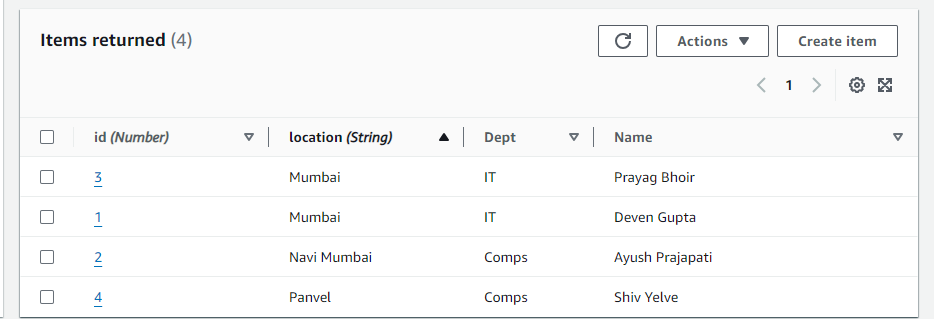

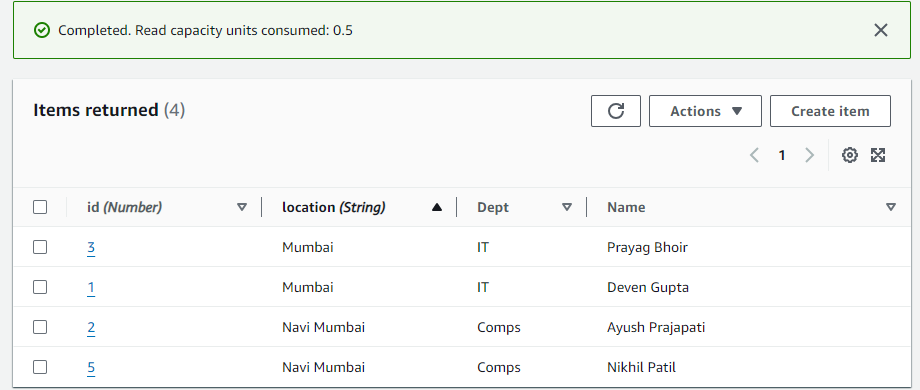

## 2. Batch Get (Read)

In [22]:
#Batch Get Item (Retrieve)

response = dynamodb.batch_get_item(
    RequestItems={
        'deven_dynamo_table': {
            'Keys': [
                {'id': 1 ,'location': 'Mumbai'},
                {'id': 5 ,'location': 'Navi Mumbai'}
            ]
        }
    }
)

items = response['Responses']['deven_dynamo_table']
print("BatchGetItem succeeded:", items)


BatchGetItem succeeded: [{'Dept': 'IT', 'location': 'Mumbai', 'id': Decimal('1'), 'Name': 'Deven Gupta'}, {'Dept': 'Comps', 'location': 'Navi Mumbai', 'id': Decimal('5'), 'Name': 'Nikhil Patil'}]


## Query and Scan Operations

## 1. Query

In [23]:
table = dynamodb.Table('deven_dynamo_table')

In [24]:
response = table.query(
    KeyConditionExpression='id = :id',
    ExpressionAttributeValues={
        ':id': 1
    }
)

items = response['Items']
print("Query succeeded:", items)


Query succeeded: [{'Dept': 'IT', 'location': 'Mumbai', 'id': Decimal('1'), 'Name': 'Deven Gupta'}]


## 2. Scan

In [27]:
response = table.scan(
    FilterExpression='Dept = :dept',
    ExpressionAttributeValues={
        ':dept': 'IT'
    }
)

items = response['Items']
print("Scan succeeded:", items)


Scan succeeded: [{'Dept': 'IT', 'location': 'Mumbai', 'id': Decimal('3'), 'Name': 'Prayag Bhoir'}, {'Dept': 'IT', 'location': 'Mumbai', 'id': Decimal('1'), 'Name': 'Deven Gupta'}]


## Handling Exceptions


In [28]:
from botocore.exceptions import ClientError

try:
    response = table.get_item(Key={'id': '1'})
    item = response.get('Item')
    print("Item retrieved:", item)
except ClientError as e:
    print("Error occurred:", e.response['Error']['Message'])


Error occurred: The provided key element does not match the schema
